In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [6]:
def visualise(epsilon, delta, f_overline, power, trend):
    p_monotone = pd.read_csv("./Visualise/sensitivity_"+("%.2f" % f_overline)+"_epsilon_"+("%.1f" % epsilon) \
                     +"_delta_"+("%.1f" % delta)+"_monoton_1_power_"+str(power)+".csv", header = None).iloc[0]
    p_general = pd.read_csv("./Visualise/sensitivity_"+("%.2f" % f_overline)+"_epsilon_"+("%.1f" % epsilon) \
                     +"_delta_"+("%.1f" % delta)+"_monoton_0_power_"+str(power)+".csv", header = None).iloc[0]
    beta = 0.5
    X = np.arange(-28, 28 + 10**(-3), beta)
    plt.style.use('default')
    density_monotone, density  = (p_monotone/beta), (p_general/beta)
    plt.ylim(0, 0.08)
    #make bigger plt.title
    plt.title(r"$\epsilon =$ "+str(epsilon) + r", $\delta = $" + str(delta), fontsize=16)
    # plt.bar(X[:-1], width=X[1:]-X[:-1], height=density_monotone, color = "blue", label = "monotone", alpha= 0.2, align="edge")
    #only bars without fill
    #plt.bar(X[:-1], width=X[1:]-X[:-1], height=density_monotone, fill = True, color = "white", edgecolor = "blue", label = "monotone", alpha= 0.2, align="edge")
    #plt.bar with only edges
    plt.step(X[:-1], density_monotone, 'blue', where="post",linewidth=2.4, alpha= 0.6, label = "monotone")
    # plt.bar(X[:-1], width=X[1:]-X[:-1], height=density_monotone, color = "blue", label = "monotone", alpha= 0.2, align="edge")

    #plot the "monotone" one as a line only
    plt.bar(X[:-1], width=X[1:]-X[:-1], height=density, color = "red", label = "unconstrained", alpha= 0.2, align="edge")
    if trend:
        plt.legend(loc="upper right")
    else: #do not show the legend
        plt.legend().set_visible(False)
    # plt.xlim(0, 1)
    # plt.show()
    #transparency is lost while saving, fix this
    plt.savefig("line_sensitivity_"+("%.2f" % f_overline)+"_epsilon_"+("%.1f" % epsilon) \
                     +"_delta_"+("%.1f" % delta)+"_monoton_1_power_"+str(power)+".pdf", format='pdf',bbox_inches='tight')
    

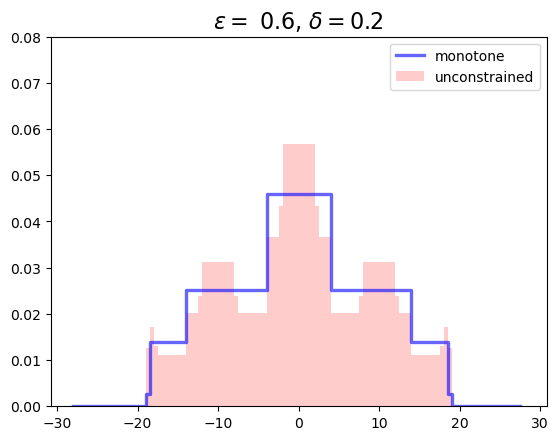

In [7]:
visualise(0.6, 0.2, 10, 0, True) #minimize ell_1 #used in the paper

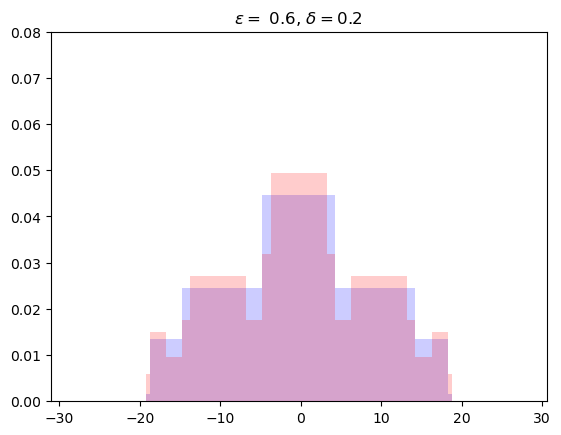

In [247]:
visualise_v2(0.6, 0.2, 10, 1)

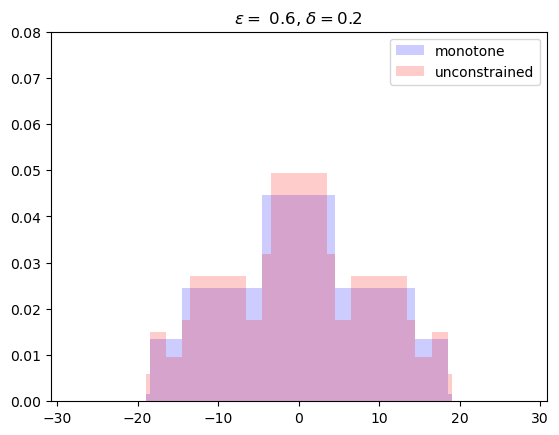

In [236]:
visualise(0.6, 0.2, 10, 1) #minimize ell_2

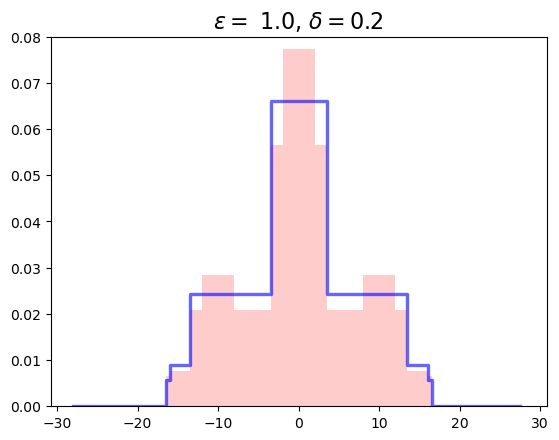

In [8]:
visualise(1.0, 0.2, 10, 0, False) #used in the paper

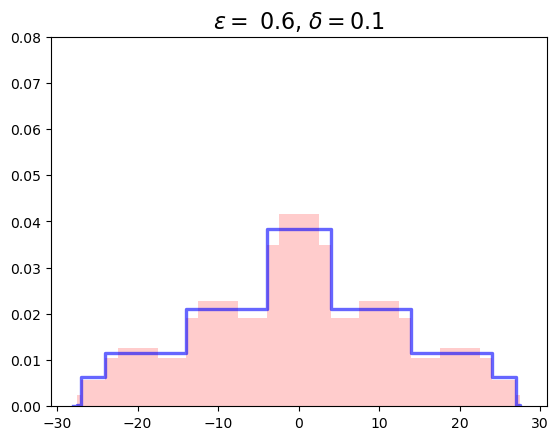

In [9]:
visualise(0.6, 0.1, 10, 0, False) #used in the paper

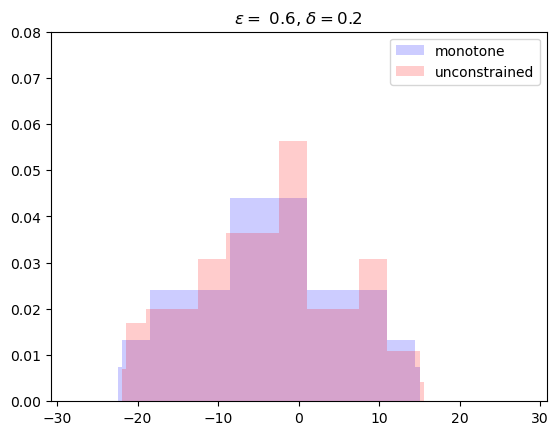

In [206]:
visualise(0.6, 0.2, 10, 3) #minimize asymmetric

In [18]:
def visualise(epsilon, delta, f_overline, trend):
    p_monotone = pd.read_csv("./Visualise/github_sensitivity_"+("%.2f" % f_overline)+"_epsilon_"+("%.1f" % epsilon) \
                     +"_delta_"+("%.1f" % delta)+"_monoton_0_power_"+str(3)+".csv", header = None).iloc[0]
    p_general = pd.read_csv("./Visualise/github_sensitivity_"+("%.2f" % f_overline)+"_epsilon_"+("%.1f" % epsilon) \
                     +"_delta_"+("%.1f" % delta)+"_monoton_0_power_"+str(0)+".csv", header = None).iloc[0]
    beta = 0.05
    X = np.arange(-2, 2 + 10**(-3), beta)
    plt.style.use('default')
    density_monotone, density  = (p_monotone/beta), (p_general/beta)
    # plt.ylim(0, 0.08)
    #make bigger plt.title
    # plt.title(r"$\epsilon =$ "+str(epsilon) + r", $\delta = $" + str(delta), fontsize=16)
    # plt.bar(X[:-1], width=X[1:]-X[:-1], height=density_monotone, color = "blue", label = "monotone", alpha= 0.2, align="edge")
    #only bars without fill
    #plt.bar(X[:-1], width=X[1:]-X[:-1], height=density_monotone, fill = True, color = "white", edgecolor = "blue", label = "monotone", alpha= 0.2, align="edge")
    #plt.bar with only edges
    plt.step(X[:-1], density_monotone, 'blue', where="post",linewidth=2.4, alpha= 0.6, label = "asymmetric loss")
    # plt.bar(X[:-1], width=X[1:]-X[:-1], height=density_monotone, color = "blue", label = "monotone", alpha= 0.2, align="edge")

    #plot the "monotone" one as a line only
    plt.bar(X[:-1], width=X[1:]-X[:-1], height=density, color = "red", label = "symmetric loss", alpha= 0.2, align="edge")
    if trend:
        plt.legend(loc="upper right")
    else: #do not show the legend
        plt.legend().set_visible(False)
    #add a vertical line on the point x=0
    plt.axvline(x=0, color='k', linestyle='--')
    # plt.xlim(0, 1)
    # plt.show()
    #transparency is lost while saving, fix this
    
    plt.savefig("github_line_sensitivity.pdf", format='pdf',bbox_inches='tight')
    

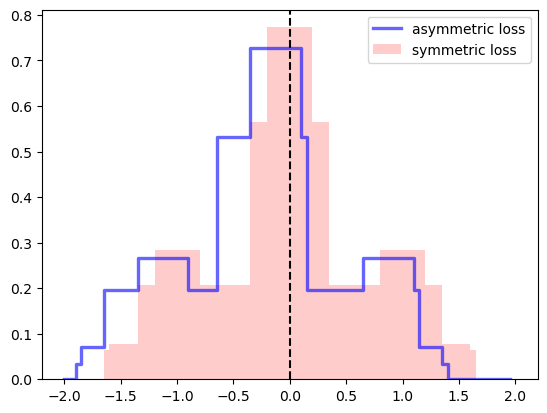

In [19]:
visualise(1.0, 0.2, 1.0, True)

In [35]:
def visualise_ell1vsell2(epsilon, delta, f_overline, trend):
    p_ell1 = pd.read_csv("./Visualise/github_compare_sensitivity_"+("%.2f" % f_overline)+"_epsilon_"+("%.1f" % epsilon) \
                     +"_delta_"+("%.1f" % delta)+"_monoton_0_power_"+str(0)+".csv", header = None).iloc[0]
    p_ell2 = pd.read_csv("./Visualise/github_compare_sensitivity_"+("%.2f" % f_overline)+"_epsilon_"+("%.1f" % epsilon) \
                     +"_delta_"+("%.1f" % delta)+"_monoton_0_power_"+str(1)+".csv", header = None).iloc[0]
    beta = 0.5
    X = np.arange(-12, 12 + 10**(-3), beta)
    plt.style.use('default')
    density_monotone, density  = (p_ell1/beta), (p_ell2/beta)
    # plt.ylim(0, 0.08)
    #make bigger plt.title
    # plt.title(r"$\epsilon =$ "+str(epsilon) + r", $\delta = $" + str(delta), fontsize=16)
    # plt.bar(X[:-1], width=X[1:]-X[:-1], height=density_monotone, color = "blue", label = "monotone", alpha= 0.2, align="edge")
    #only bars without fill
    #plt.bar(X[:-1], width=X[1:]-X[:-1], height=density_monotone, fill = True, color = "white", edgecolor = "blue", label = "monotone", alpha= 0.2, align="edge")
    #plt.bar with only edges
    #latex label
    # plt.xlabel(r"$\theta$", fontsize=16)
    plt.step(X[:-1], density_monotone, 'blue', where="post",linewidth=2.4, alpha= 0.6, label = r"$\ell_1$-loss")
    # plt.bar(X[:-1], width=X[1:]-X[:-1], height=density_monotone, color = "blue", label = "monotone", alpha= 0.2, align="edge")

    #plot the "monotone" one as a line only
    plt.bar(X[:-1], width=X[1:]-X[:-1], height=density, color = "red", label = r"$\ell_2$-loss", alpha= 0.2, align="edge")
    if trend:
        plt.legend(loc="upper right")
    else: #do not show the legend
        plt.legend().set_visible(False)
    #add a vertical line on the point x=0
    plt.axvline(x=0, color='k', linestyle='--')
    # plt.xlim(0, 1)
    # plt.show()
    #transparency is lost while saving, fix this
    
    plt.savefig("github_line_compare.pdf", format='pdf',bbox_inches='tight')
    

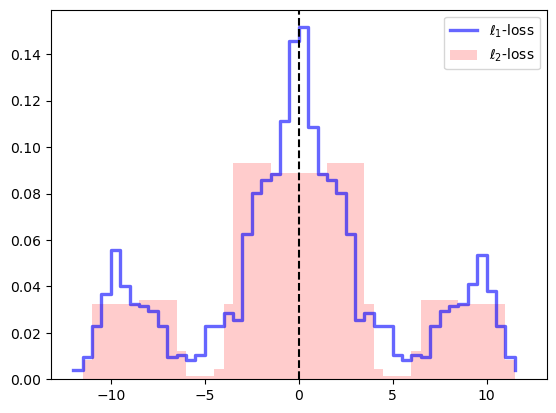

In [36]:
visualise_ell1vsell2(1.0, 0.4, 10.0, True)